<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

**Problem Statement** :
Diabetes is a chronic health condition that affects millions of people worldwide, leading to severe complications if not diagnosed and managed early. Early prediction of diabetes based on patient medical history and demographic information can significantly improve patient outcomes by enabling timely intervention and personalized treatment plans.

This project involves the use of a comprehensive dataset containing various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level, along with the diabetes status (positive or negative) of patients. The objective is to build a robust machine learning model that can accurately predict the likelihood of a patient developing diabetes based on these features.

## Dataset Features:                                 

**gender** : This represents the gender of the patient.

**age** : This indicates the age of the patient in years.

**hypertension** : This is a binary variable indicating whether the patient has hypertension (high blood pressure). It typically takes the value 0 for "No" and 1 for "Yes."

**heart_disease** : This is a binary variable indicating whether the patient has been diagnosed with heart disease. Like hypertension, it takes the value 0 for "No" and 1 for "Yes."

**smoking_history** : This represents the patient's history of smoking. It is a categorical variable that may include values like "never," "former," "current," and possibly others like "No Info" (if there's missing information).

**bmi** : This stands for Body Mass Index (BMI), a continuous numerical variable that measures body fat based on height and weight. It is often used to categorize individuals into weight categories such as underweight, normal weight, overweight, and obese.

**HbA1c_level** : This represents the level of Hemoglobin A1c (HbA1c) in the blood, measured as a percentage. HbA1c is an indicator of average blood glucose levels over the past 2-3 months, and it is commonly used to diagnose and monitor diabetes.

**blood_glucose_level** : This is the patient's blood glucose (sugar) level, typically measured in mg/dL. It is a continuous numerical variable and an important indicator for diagnosing diabetes.

**diabetes** : This is the target variable indicating whether the patient has been diagnosed with diabetes. It is a binary variable, where 0 means "No Diabetes" and 1 means "Has Diabetes."

In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
# first five observations
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#last five observations
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
#columns in dataframe
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#shape of dataframe
df.shape

(100000, 9)

In [ ]:
# statistical summary of data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#null values in dataframe
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


<Axes: >

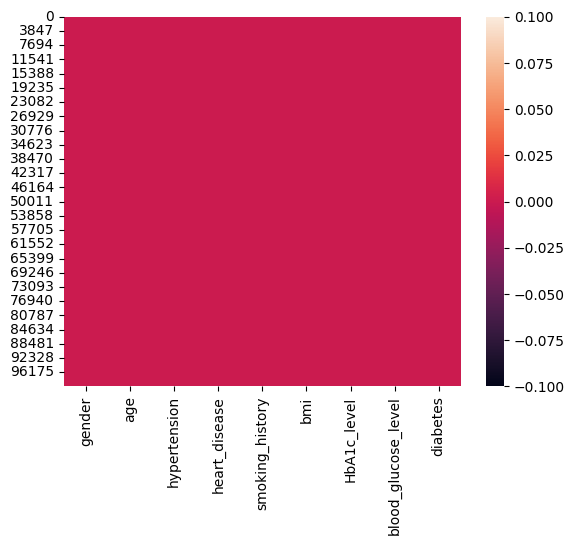

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# distribution of target variable
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


In [ ]:
# percentage of diabetic patients

total_patients = len(df)
diabetic_patients = df['diabetes'].sum()

percentage_of_diabetic_patients = (diabetic_patients/total_patients)*100
print(percentage_of_diabetic_patients)

8.5


<Axes: xlabel='diabetes', ylabel='count'>

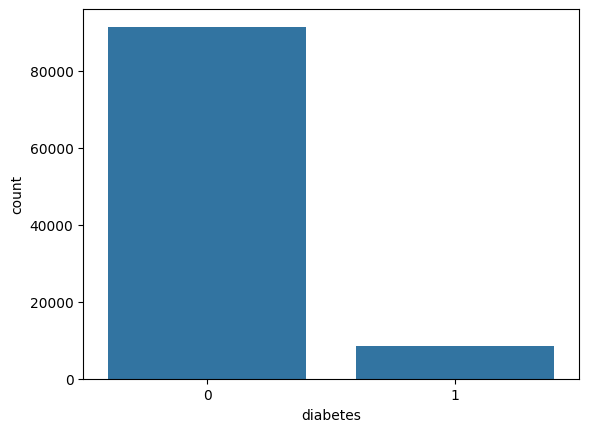

In [ ]:
#distribution of target variable
sns.countplot(df, x='diabetes')

<Axes: xlabel='gender', ylabel='count'>

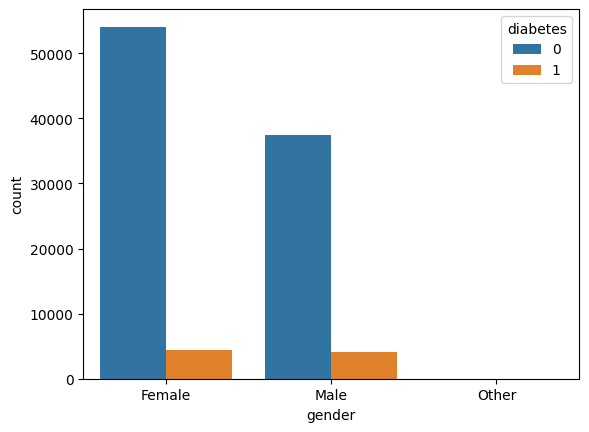

In [ ]:
sns.countplot(df,x='gender', hue='diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

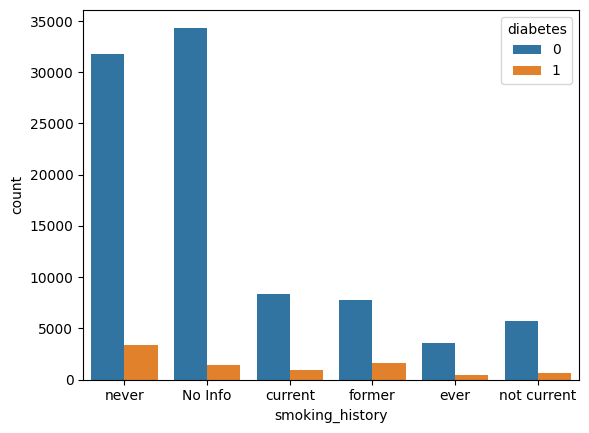

In [ ]:
sns.countplot(df,x='smoking_history', hue='diabetes')

<Axes: ylabel='bmi'>

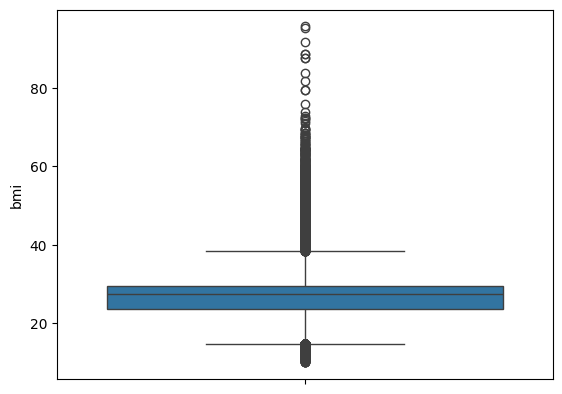

In [ ]:
#outliers in data
sns.boxplot(data=df['bmi'])

<Axes: ylabel='blood_glucose_level'>

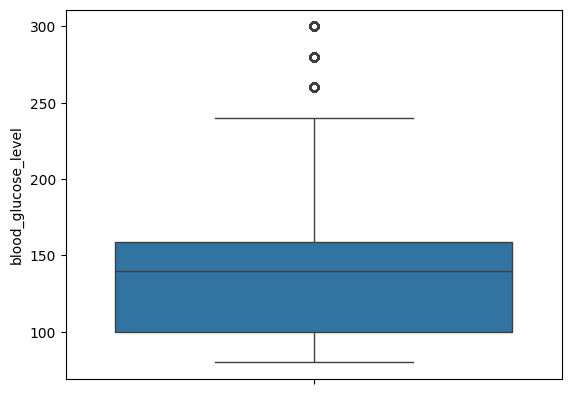

In [ ]:
#outliers in data
sns.boxplot(data=df['blood_glucose_level'])

In [ ]:
# length of df before removing outliers
len(df)

100000

## Outliers detection

In [ ]:
columns = ['bmi','blood_glucose_level']

def remove_outlier(df,columns):
  for column in columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [ ]:
df = remove_outlier(df,columns)

In [ ]:
# length of df after removing outliers
len(df)

91239

<Axes: ylabel='bmi'>

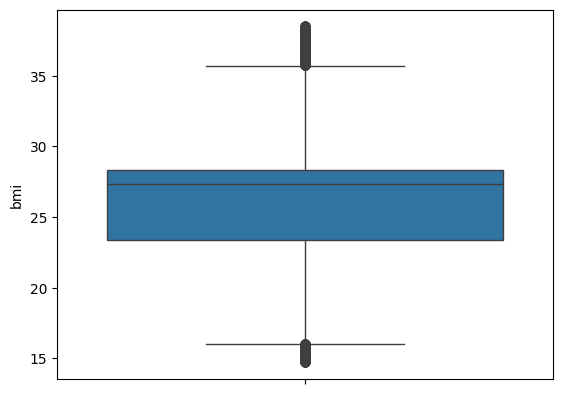

In [ ]:
sns.boxplot(data=df['bmi'])

<Axes: ylabel='blood_glucose_level'>

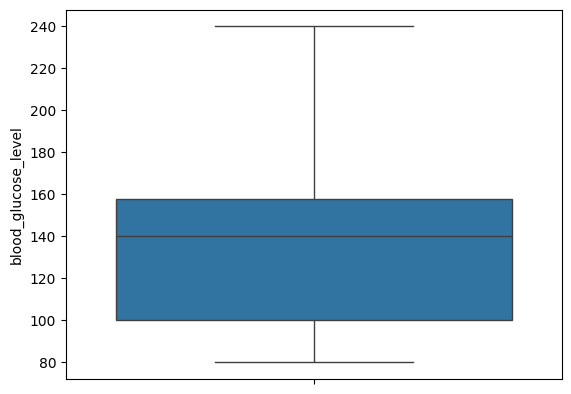

In [ ]:
sns.boxplot(data=df['blood_glucose_level'])

## Machine Learning Model

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [ ]:
# converting categorical columns into numerical
df['gender'] = df['gender'].replace({'Female':0,'Male':1,'Other':2})

In [ ]:
df['smoking_history'] = df['smoking_history'].replace({'No Info':0, 'never':1, 'former':2, 'current':3, 'not current':4, 'ever':5})

## Correlation between features

<Axes: >

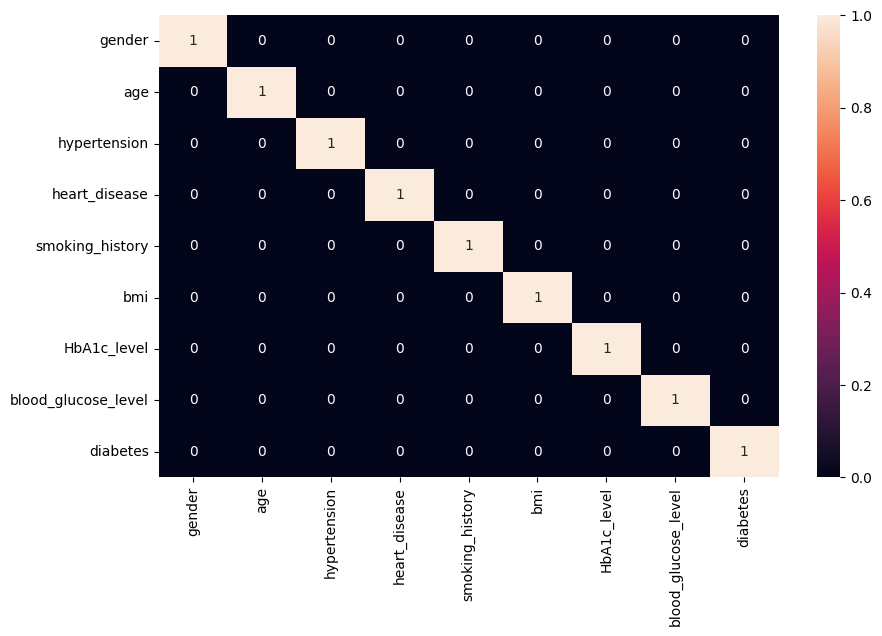

In [ ]:
# heatmap to check the correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() > 0.8, annot=True)

In [ ]:
X = df[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]
Y = df['diabetes']

In [ ]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
X.shape, X_train.shape, X_test.shape

((91239, 8), (72991, 8), (18248, 8))

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
dt = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()

In [ ]:
#model training
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

for model in (lr,rfc,svc,dt,gbc):
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  accuracy_on_test_data = accuracy_score(Y_test,y_pred)
  print(f'{model} Accuracy Score -----> {accuracy_on_test_data}')
  print(classification_report(Y_test,y_pred))
  print(confusion_matrix(Y_test,y_pred))
  print('-'*80)

LogisticRegression() Accuracy Score -----> 0.9642700569925471
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17209
           1       0.84      0.46      0.60      1039

    accuracy                           0.96     18248
   macro avg       0.90      0.73      0.79     18248
weighted avg       0.96      0.96      0.96     18248

[[17114    95]
 [  557   482]]
--------------------------------------------------------------------------------
RandomForestClassifier() Accuracy Score -----> 0.9729833406400702
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17209
           1       0.93      0.57      0.70      1039

    accuracy                           0.97     18248
   macro avg       0.95      0.78      0.85     18248
weighted avg       0.97      0.97      0.97     18248

[[17166    43]
 [  450   589]]
---------------------------------------------------------------------------

# Addressing Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smt, y_train_smt = smote.fit_resample(X_train,Y_train)

In [ ]:
from collections import Counter

print('Original Dataset shape -', Counter(Y_train))
print()
print('Random oversampled data', Counter(y_train_smt))

Original Dataset shape - Counter({0: 68683, 1: 4308})

Random oversampled data Counter({0: 68683, 1: 68683})


In [ ]:
for model in (lr, rfc, svc, dt, gbc):
  model.fit(x_train_smt, y_train_smt)
  y_pred = model.predict(X_test)
  accuracy_of_test_data = accuracy_score(Y_test,y_pred)
  print(f'{model} ---> {accuracy_of_test_data}')
  print(classification_report(Y_test,y_pred))
  print(confusion_matrix(Y_test,y_pred))
  print('-'*80)

LogisticRegression() ---> 0.8619026742656729
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17209
           1       0.28      0.88      0.42      1039

    accuracy                           0.86     18248
   macro avg       0.63      0.87      0.67     18248
weighted avg       0.95      0.86      0.89     18248

[[14818  2391]
 [  129   910]]
--------------------------------------------------------------------------------
RandomForestClassifier() ---> 0.9610368259535291
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17209
           1       0.66      0.65      0.65      1039

    accuracy                           0.96     18248
   macro avg       0.82      0.81      0.82     18248
weighted avg       0.96      0.96      0.96     18248

[[16864   345]
 [  366   673]]
--------------------------------------------------------------------------------
SVC() ---> 0.859491451117930

## Addressing Class Imbalance with RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
os_x,os_y = over_sampler.fit_resample(X_train,Y_train)
print('Original Dataset shape -', Counter(Y_train))
print()
print('Random oversampled data', Counter(os_y))

Original Dataset shape - Counter({0: 68683, 1: 4308})

Random oversampled data Counter({0: 68683, 1: 68683})


In [ ]:
for model in (lr, rfc, svc, dt, gbc):
  model.fit(os_x,os_y)
  y_pred = model.predict(X_test)
  accuracy_of_test_data = accuracy_score(Y_test,y_pred)
  print(f'{model} ---> {accuracy_of_test_data}')
  print(classification_report(Y_test,y_pred))
  print(confusion_matrix(Y_test,y_pred))
  print('-'*80)

LogisticRegression() ---> 0.8606422621657168
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17209
           1       0.27      0.87      0.42      1039

    accuracy                           0.86     18248
   macro avg       0.63      0.87      0.67     18248
weighted avg       0.95      0.86      0.89     18248

[[14796  2413]
 [  130   909]]
--------------------------------------------------------------------------------
RandomForestClassifier() ---> 0.9677772906619904
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17209
           1       0.78      0.60      0.68      1039

    accuracy                           0.97     18248
   macro avg       0.88      0.80      0.83     18248
weighted avg       0.97      0.97      0.97     18248

[[17033   176]
 [  412   627]]
--------------------------------------------------------------------------------
SVC() ---> 0.860587461639631

## Conclusion :

1. **Model Performance Without Oversampling:**

Gradient Boosting Classifier achieved the highest accuracy (97.49%) with the original imbalanced dataset.
Most models performed well in terms of overall accuracy, but their recall for detecting diabetes (positive class) was relatively low, indicating difficulty in identifying patients with diabetes.

2. **Class Imbalance Issue:**

There is significant class imbalance in the dataset, with far fewer positive diabetes cases (only 6%) compared to non-diabetes cases (94%). This skewed distribution affects the model's ability to predict positive cases, leading to lower recall for the minority class.

3. **Impact of SMOTE**:

After applying SMOTE, recall for the positive class improved significantly for all models, with RandomForestClassifier achieving 65% recall.
However, precision dropped in some models, particularly in Logistic Regression and Support Vector Classifier, showing that while more positive cases were identified, there were also more false positives.

4. **Impact of Random OverSampling:**

Random oversampling produced similar results to SMOTE, improving recall for the positive class (diabetes) but at the cost of lower precision in some models.
Models like RandomForestClassifier maintained a good balance between recall and precision, showing a significant improvement compared to the original dataset.

5. **Best Performing Model:**

The RandomForestClassifier performed consistently well, especially after applying SMOTE or Random OverSampling, achieving a good balance between high accuracy (96%) and improved recall (65%) for the minority class (diabetes).